In [ ]:
!pip install transformers

In [ ]:
!pip install sentence_transformers

In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
import pandas as pd

file_path = 'coffee_analysis.csv'
coffee_data = pd.read_csv(file_path)

coffee_data.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


In [3]:
cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2') # https://www.sbert.net/docs/pretrained_models.html

In [5]:
desc_1_vect = model.encode(coffee_data['desc_1'], batch_size=64, device=device, show_progress_bar=True)
# desc_2_vect = model.encode(coffee_data['desc_2'], batch_size=64, device=device, show_progress_bar=True)
desc_3_vect = model.encode(coffee_data['desc_3'], batch_size=64, device=device, show_progress_bar=True)

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

In [8]:
# !pip install -U scikit-learn==1.3

In [65]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
# from sklearn.cluster import HDBSCAN

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(coffee_data[['100g_USD', 'rating']])
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded_features = one_hot_encoder.fit_transform(coffee_data[['origin_1', 'origin_2']])

sentence_embeddings = np.concatenate((desc_1_vect, desc_3_vect), axis=1)

combined_features = np.concatenate((sentence_embeddings, scaled_numerical_features, one_hot_encoded_features), axis=1)

pca = PCA(n_components=10)
reduced_features = pca.fit_transform(combined_features)

n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', max_iter=1000, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# hdbscan = HDBSCAN(min_cluster_size=10)
# clusters = hdbscan.fit_predict(reduced_features)

coffee_data['cluster'] = clusters

coffee_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3,cluster
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...,0
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ...",17
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce...",9
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...,12
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...,17


In [74]:
coffee_data[coffee_data['cluster'] == 17]

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3,cluster
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ...",17
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...,17
43,Ethiopia Banko Gotiti Natural G1,Green Stone Coffee,Light,Taiwan,Kochere,Yirgacheffe Growing Region,8.44,94,December 2017,"Crisp, sweetly tart. Dark chocolate, pie cherr...",This coffee tied for the third-highest rating ...,An inviting natural-processed coffee from Ethi...,17
64,El Peñon Nicaragua,Barrington Coffee Roasting,Light,United States,Jinotega,Nicaragua,5.28,94,December 2017,"Vibrant, richly sweet, clear-toned. Roasted ca...",Produced by Markus Fisher at Finca La Bastilla...,Coffee Review’s highest scoring Nicaragua coff...,17
77,Ethiopia Banko Gotiti,Red Rooster Coffee Roaster,Light,United States,Kochere,Yirgacheffe Growing Region,4.99,94,January 2018,"Resonantly fruit-forward, elegant, complex. Ho...",Southern Ethiopia coffees like this one are pr...,A juicy-sweet Ethiopia natural cup: lively and...,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,Colombia Castillo Fruit Maceration Series (Peach),modcup coffee,Medium-Light,United States,Armenia,Quindio Department,11.02,94,October 2022,"Elegantly floral, richly sweet. White peach, l...",Produced by Jairo Arcila and Cofinet of Finca ...,"A fruit-forward, experimentally processed Colo...",17
2073,Costa Rica Las Lajas Perla Negra,Durango Coffee Companuy,Medium-Light,United States,Sabanilla De Alajuela Growing Region,Costa Rica,5.57,94,October 2022,"Delicately fruit-toned, richly tart. Raspberry...",Produced by Oscar and Francisca Chacon entirel...,A fruit-centric natural-processed Costa Rica c...,17
2077,Guatemala El Injerto Pacamara,Equator Coffees,Medium-Light,United States,La Libertad,Huehuetenango Department,12.93,94,November 2022,"Complex, multi-layered, resonantly deep. Dark ...",Produced by Arturo Aguirre of El Injerto Farm ...,A fine umami-tending cup with equal impulses t...,17
2086,Colombia Tres Dragones,Bird Rock Coffee Roasters,Light,United States,Caicedonia,Valle De Cauca Department,8.11,94,November 2022,"Richly chocolaty, sweetly fermenty. Cherry cor...",Produced by Rigoberto and Rodrigo Herrera of F...,"A delicately fermenty, richly chocolaty fruit ...",17


In [71]:
df = coffee_data.copy()
for i in range(0, reduced_features.shape[1]):
    df[f'PCA_{i+1}'] = reduced_features[:, i]
df.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,...,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",...,1.137991,-0.532089,-0.235274,-0.112214,-0.211907,0.094033,0.083707,0.654740,-0.003172,-0.058305
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",...,0.387250,-0.411746,-0.160809,-0.075977,-0.124779,0.050064,0.015350,0.329844,-0.026129,-0.014534
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",...,-0.790012,0.149722,0.872828,0.557211,0.019388,-0.041409,0.236307,-0.024226,-0.200588,-0.030595
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",...,-0.814807,0.113397,1.336146,-0.367260,0.030782,-0.041259,0.091267,-0.022669,0.002965,0.031185
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",...,0.129486,-0.676121,-0.095483,-0.022307,-0.021159,0.039004,-0.323726,-0.075447,-0.030419,-0.361783


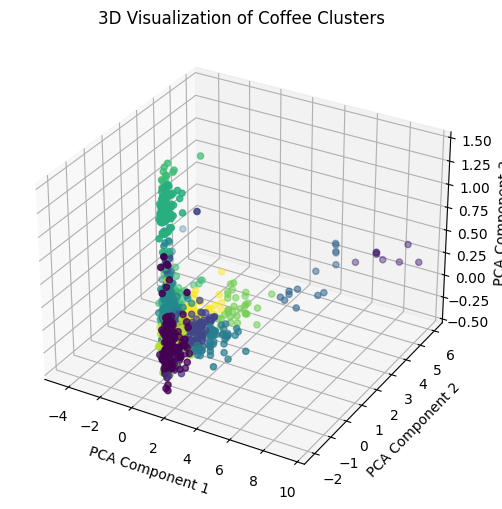

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n_pca_components = reduced_features.shape[1]

if n_pca_components == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.title('2D Visualization of Coffee Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

elif n_pca_components >= 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=clusters, cmap='viridis', marker='o')
    ax.set_title('3D Visualization of Coffee Clusters')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.show()



In [19]:
!pip install dash dash-renderer dash-html-components dash-core-components plotly

In [73]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)
fig = px.scatter_3d(df, x='PCA_1', y='PCA_2', z='PCA_3', color='cluster', hover_data=['name', 'roaster'])

app.layout = html.Div([
    dcc.Graph(id='cluster-plot', figure=fig),
    html.Div(id='bean-info')
])

@app.callback(
    Output('bean-info', 'children'),
    [Input('cluster-plot', 'hoverData')]
)
def display_bean_info(hoverData):
    # Extract and return info based on hoverData
    # For example:
    bean_info = hoverData['points'][0]['customdata']
    return f"Coffee Bean Info: {bean_info}"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [75]:
df.to_csv('coffee_cluster.csv')